# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
df['Gender'] = np.where(df['Gender']=='Male',1,0)

## 2. Clustering

In [15]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

standard_scaler = StandardScaler()
df_scaled= pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

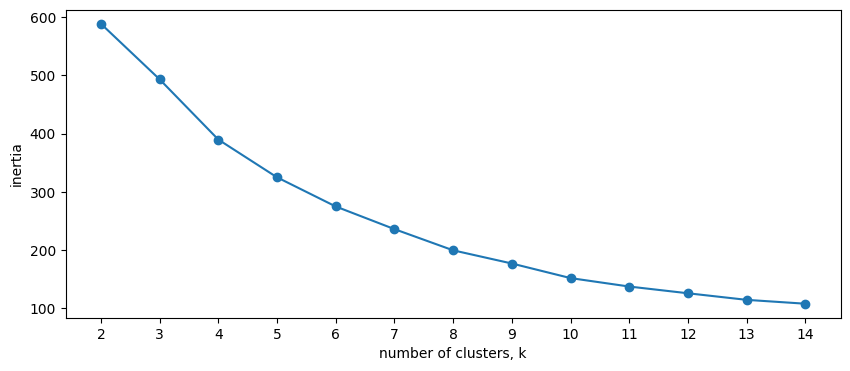

In [18]:
from sklearn.cluster import KMeans

ks = range(2, 15)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

k : 2 silhouette_score :  0.2518152915788437
k : 3 silhouette_score :  0.25951265087431563
k : 4 silhouette_score :  0.3012323168801352
k : 5 silhouette_score :  0.3169033909887276
k : 6 silhouette_score :  0.33432134408851794
k : 7 silhouette_score :  0.3579743736418625
k : 8 silhouette_score :  0.38738083581583793
k : 9 silhouette_score :  0.40263685269168387
k : 10 silhouette_score :  0.42076374869477745
k : 11 silhouette_score :  0.43049529041422596
k : 12 silhouette_score :  0.4297601405768306
k : 13 silhouette_score :  0.4272963680045238
k : 14 silhouette_score :  0.42334085754817524
k : 15 silhouette_score :  0.42542031357739435
k : 16 silhouette_score :  0.42178888778486223
k : 17 silhouette_score :  0.42692861087001677
k : 18 silhouette_score :  0.4123399607755067
k : 19 silhouette_score :  0.4021678098874359
k : 20 silhouette_score :  0.4266249740183771
k : 21 silhouette_score :  0.4012815844398005
k : 22 silhouette_score :  0.4121020050390257
k : 23 silhouette_score :  0.397

<function matplotlib.pyplot.show(close=None, block=None)>

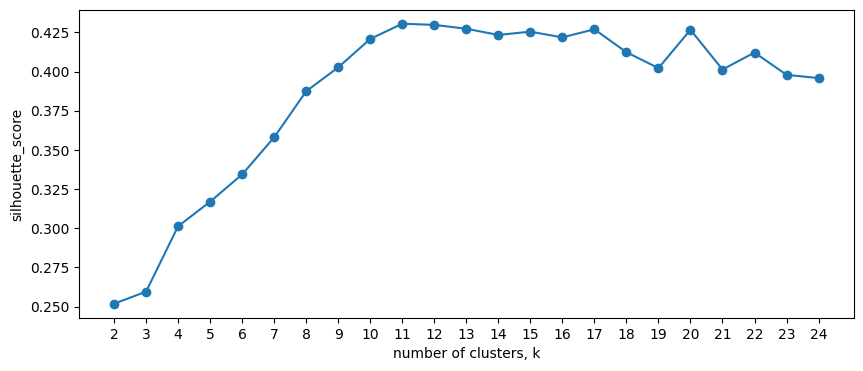

In [22]:
from sklearn.metrics import silhouette_score

ks = range(2, 25)
silhouette_scores = []

best_n = -1
best_silhouette_score = -1

for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_scaled)
    clusters = model.predict(df_scaled)

    score = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(score)
    print('k :', k, 'silhouette_score : ', score)

    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n :', best_n, 'best score : ', best_silhouette_score)

plt.figure(figsize=(10, 4))

plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette_score')
plt.xticks(ks)
plt.show

## 3. Evaluation

In [ ]:
'''
Inertia를 보았을 땐 명확한 클러스터의 개수를 알 수 없지만
실루엣 스코어를 보앗을때 11의 k값으로 두었을 때 최적임을 알 수 있다.
'''

In [23]:
KMeans_model = KMeans(n_clusters = 11)
KMeans_model.fit(df_scaled)
KMeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 1,  1,  9, 10,  9, 10,  9, 10,  8, 10,  8, 10,  9, 10,  8,  1,  9,
        1,  8, 10,  8,  1,  9,  1,  9,  1,  9,  1,  9, 10,  8, 10,  8,  1,
        9, 10,  9, 10,  9, 10,  3,  1,  8,  0,  9, 10,  3,  0,  0,  0,  3,
        1,  0,  5,  3,  8,  3,  5,  0,  5,  5,  1,  3,  3,  5,  1,  3,  3,
        1,  0,  5,  3,  3,  3,  5,  1,  3,  1,  0,  3,  5,  1,  5,  3,  0,
        5,  3,  0,  0,  3,  3,  1,  5,  0,  0,  1,  3,  0,  5,  1,  0,  3,
        5,  1,  5,  0,  3,  5,  5,  5,  5,  0,  0,  1,  0,  0,  3,  3,  3,
        3,  1,  0,  0,  7,  0,  4,  2,  7,  2,  7,  2,  7,  0,  4,  2,  4,
        6,  7,  2,  4,  6,  7,  0,  4,  2,  7,  2,  4,  6,  7,  2,  7,  6,
        4,  6,  4,  2,  4,  2,  4,  3,  4,  2,  4,  2,  4,  2,  4,  6,  7,
        2,  7,  2,  7,  6,  4,  2,  7,  2,  7,  6,  4,  2,  4,  6,  7,  6,
        7,  6,  4,  6,  4,  2,  4,  6,  4,  6,  7,  2,  7], dtype=int32)

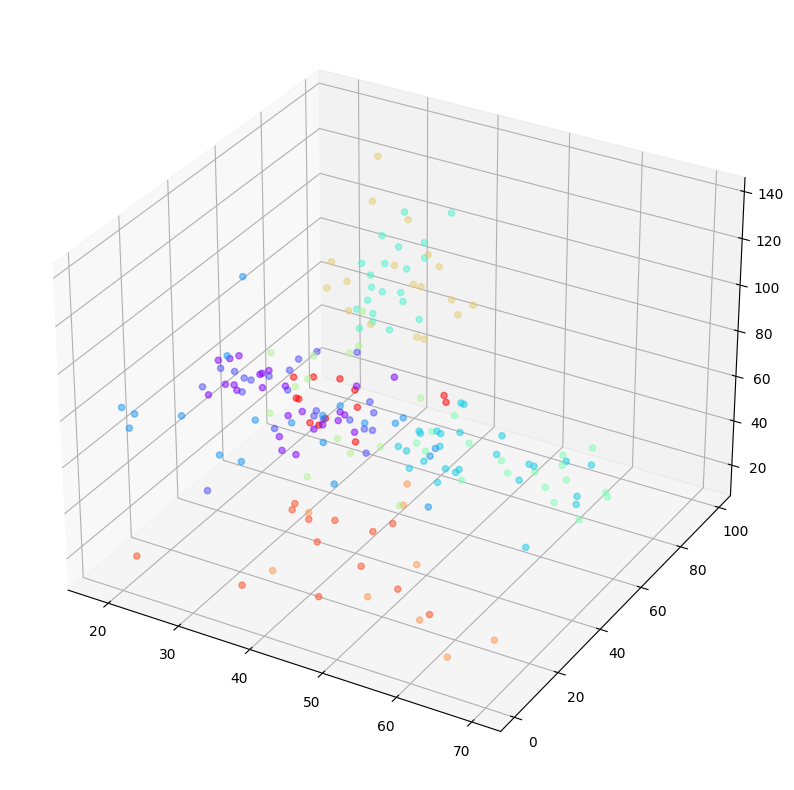

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Spending Score (1-100)'], df['Annual Income (k$)'], c = KMeans_model.labels_, s= 20, alpha=0.5, cmap='rainbow')